<a href="https://colab.research.google.com/github/IEXE-Tec/aprendizaje-maquina-2/blob/master/07_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing pycaret library:
+ https://towardsdatascience.com/announcing-pycaret-2-0-39c11014540e 
+ https://pycaret.org/


In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 6.8MB 8.1MB/s 
     |████████████████████████████████| 266kB 43.2MB/s 
     |████████████████████████████████| 1.6MB 24.1MB/s 
     |████████████████████████████████| 1.8MB 35.1MB/s 
     |████████████████████████████████| 174kB 35.5MB/s 
     |████████████████████████████████| 276kB 41.4MB/s 
     |████████████████████████████████| 13.9MB 329kB/s 
     |████████████████████████████████| 148.9MB 69kB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
     |████████████████████████████████| 66.2MB 55kB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 3.1MB 43.5MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 604kB 35.3MB/s 
     |████████████████████████████████| 6.0MB 5.3MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     

In [2]:
from pycaret.utils import version
version()

'2.2.0'

Installing Autocorrect:
+ https://github.com/phatpiglet/autocorrect


In [3]:
!pip install autocorrect

     |████████████████████████████████| 624kB 2.6MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.2.2-cp36-none-any.whl size=621491 sha256=ecd629b123815809d3a95b1155490c2d01d7299cf045c376e93dd98728fd0156
  Stored in directory: /root/.cache/pip/wheels/b4/0b/7d/98268d64c8697425f712c897265394486542141bbe4de319d6
Successfully built autocorrect


In [4]:
import nltk
import pycaret

# Processing

## I. Tokenization

In [5]:
# importar el modulo de tokenizacion de nltk
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
example_text = "Esto es un ejemplo. O noooo?"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Esto es un ejemplo.', 'O noooo?']
['Esto', 'es', 'un', 'ejemplo', '.', 'O', 'noooo', '?']


In [7]:
# Texto de ejemplo. Ene ste caso usamos las tres comillas para separar
# el texto en varias lineas dentro de nuestro codigo.
example_text = ''' Hola mi nombre es Mario. Mi cuenta de github
es uumami. Estas listo para convertirte en un experto de NLP.
Ezta horacion contiene muchos erroress gramaticales.
'''
print(example_text)
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

 Hola mi nombre es Mario. Mi cuenta de github
es uumami. Estas listo para convertirte en un experto de NLP.
Ezta horacion contiene muchos erroress gramaticales.

[' Hola mi nombre es Mario.', 'Mi cuenta de github\nes uumami.', 'Estas listo para convertirte en un experto de NLP.', 'Ezta horacion contiene muchos erroress gramaticales.']
['Hola', 'mi', 'nombre', 'es', 'Mario', '.', 'Mi', 'cuenta', 'de', 'github', 'es', 'uumami', '.', 'Estas', 'listo', 'para', 'convertirte', 'en', 'un', 'experto', 'de', 'NLP', '.', 'Ezta', 'horacion', 'contiene', 'muchos', 'erroress', 'gramaticales', '.']


In [8]:
texto = word_tokenize(example_text)

# II. Spell check

In [9]:
from autocorrect import Speller

In [10]:
spell = Speller(lang='es')

dictionary for this language not found, downloading...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
done!


In [11]:
corrected_text = [spell(i) for i in texto]
corrected_text

['Hola',
 'mi',
 'nombre',
 'es',
 'Mario',
 '.',
 'Mi',
 'cuenta',
 'de',
 'github',
 'es',
 'umami',
 '.',
 'Estas',
 'listo',
 'para',
 'convertirte',
 'en',
 'un',
 'experto',
 'de',
 'LP',
 '.',
 'Esta',
 'horacio',
 'contiene',
 'muchos',
 'errores',
 'gramaticales',
 '.']

## III. Stopwords

In [12]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stopwords_en = stopwords.words('english')

counter = 0
for w in stopwords_en:
  print(w, end=', ')
  counter += 1
  if (counter%10)== 0:
    print()


i, me, my, myself, we, our, ours, ourselves, you, you're, 
you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, 
himself, she, she's, her, hers, herself, it, it's, its, itself, 
they, them, their, theirs, themselves, what, which, who, whom, this, 
that, that'll, these, those, am, is, are, was, were, be, 
been, being, have, has, had, having, do, does, did, doing, 
a, an, the, and, but, if, or, because, as, until, 
while, of, at, by, for, with, about, against, between, into, 
through, during, before, after, above, below, to, from, up, down, 
in, out, on, off, over, under, again, further, then, once, 
here, there, when, where, why, how, all, any, both, each, 
few, more, most, other, some, such, no, nor, not, only, 
own, same, so, than, too, very, s, t, can, will, 
just, don, don't, should, should've, now, d, ll, m, o, 
re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, 
doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, 
ma, mightn, might

In [14]:
stopwords_es = stopwords.words('spanish')

counter = 0
for w in stopwords_es:
  print(w, end=', ')
  counter += 1
  if (counter%10)== 0:
    print()


de, la, que, el, en, y, a, los, del, se, 
las, por, un, para, con, no, una, su, al, lo, 
como, más, pero, sus, le, ya, o, este, sí, porque, 
esta, entre, cuando, muy, sin, sobre, también, me, hasta, hay, 
donde, quien, desde, todo, nos, durante, todos, uno, les, ni, 
contra, otros, ese, eso, ante, ellos, e, esto, mí, antes, 
algunos, qué, unos, yo, otro, otras, otra, él, tanto, esa, 
estos, mucho, quienes, nada, muchos, cual, poco, ella, estar, estas, 
algunas, algo, nosotros, mi, mis, tú, te, ti, tu, tus, 
ellas, nosotras, vosotros, vosotras, os, mío, mía, míos, mías, tuyo, 
tuya, tuyos, tuyas, suyo, suya, suyos, suyas, nuestro, nuestra, nuestros, 
nuestras, vuestro, vuestra, vuestros, vuestras, esos, esas, estoy, estás, está, 
estamos, estáis, están, esté, estés, estemos, estéis, estén, estaré, estarás, 
estará, estaremos, estaréis, estarán, estaría, estarías, estaríamos, estaríais, estarían, estaba, 
estabas, estábamos, estabais, estaban, estuve, estuviste, estuvo, estuvimos, estuvi

In [15]:
def print_text(texx = [], module=10, sep=' '):
  counter = 0
  for w in texx:
    print(w, end=sep)
    counter += 1
    if (counter % module)== 0:
      print()
  print('\n ------- Tamano del texto: ', len(texx))
  print()

In [16]:
# Removamos las stopwords de nuestro texto
print('\n Texto corregido:')
print_text(corrected_text, module=11)

short_text = [w for w in corrected_text if w not in stopwords_es]
print('\n Texto sin stopwords:')
print_text(short_text, module=11)


 Texto corregido:
Hola mi nombre es Mario . Mi cuenta de github es 
umami . Estas listo para convertirte en un experto de LP 
. Esta horacio contiene muchos errores gramaticales . 
 ------- Tamano del texto:  30


 Texto sin stopwords:
Hola nombre Mario . Mi cuenta github umami . Estas listo 
convertirte experto LP . Esta horacio contiene errores gramaticales . 
 ------- Tamano del texto:  21



## IV. Stemmer

In [17]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [18]:
[stemmer.stem(i) for i in ['corriendo', 'correr', 'corremos',
                           'corriamos','corrian', 
                           'correlacion', 'correlacionado']]

['corr', 'corr', 'corr', 'corri', 'corri', 'correlacion', 'correlacion']

In [19]:
stemmed_text = [stemmer.stem(i) for i in corrected_text]
print_text(stemmed_text, module=11)

hol mi nombr es mari . mi cuent de github es 
umami . estas list par convertirt en un expert de lp 
. esta horaci contien much error gramatical . 
 ------- Tamano del texto:  30



## V. Lemmatizing

Dado que el texto que estamos anlizaando se encuenntra en espanol, es necesario buscar una funcion disenyada para nuestra lengua.  
En este nos puede ayudar spacy.  
+ spacy: https://spacy.io/usage 
+ spanish lemmatizer: https://spacy.io/models/es#es_core_news_sm 

In [20]:
!python3 -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2MB 658kB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp36-none-any.whl size=16172934 sha256=2c4148517b6adeb2c69c3088bed316acb15bce979064332be80dfac1d9ad48a2
  Stored in directory: /tmp/pip-ephem-wheel-cache-asjzx29b/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [21]:
# Importar spacy y el lemmatizer en espanyol
import spacy
import es_core_news_sm
nlp = es_core_news_sm.load()

In [22]:
ex_lem = "Hola estoy aprendiendo a utilizar inteligencia artificial. \n"
print(ex_lem)
ex_lem = word_tokenize(ex_lem)
for w in ex_lem:
  doc = nlp(w)
  for word in doc:
    print(word.text, "=>", word.lemma_)

Hola estoy aprendiendo a utilizar inteligencia artificial. 

Hola => Hola
estoy => estar
aprendiendo => aprender
a => a
utilizar => utilizar
inteligencia => inteligencia
artificial => artificial
. => .


Creemos una funcion que lemamtize un texto que ya este separado en tokens (tokenized/tokenizado).

In [23]:
def lemm_es(txx=[]):
  '''
  txx is a list or tokenized text
  retunrs: lemmatized words.
  '''
  lemm_text = []
  for w in txx:
    lemm_text.append(nlp(w)[0].lemma_)
  return lemm_text

Apliquemos el lemmatizer a nuestro texto corregido, y sin stopwords.

In [24]:
lemm_text = lemm_es(short_text)

print_text(short_text, module=11)
print_text(lemm_text, module=11)

Hola nombre Mario . Mi cuenta github umami . Estas listo 
convertirte experto LP . Esta horacio contiene errores gramaticales . 
 ------- Tamano del texto:  21

Hola nombrar Mario . Mi contar github umami . Estas listar 
convertirte experto LP . Esta horacio contener error gramatical . 
 ------- Tamano del texto:  21



## VI. Tag

In [25]:
def pos_es(txx=[]):
  '''
  txx is a list or tokenized text
  retunrs: lemmatized words.
  '''
  pos_text = []
  for w in txx:
    pos_text.append(nlp(w)[0].pos_)
  return pos_text

In [26]:
pos_text = pos_es(short_text)

print_text(short_text, module=11)
print_text(pos_text, module=11)

Hola nombre Mario . Mi cuenta github umami . Estas listo 
convertirte experto LP . Esta horacio contiene errores gramaticales . 
 ------- Tamano del texto:  21

PROPN NOUN PROPN PUNCT DET VERB PROPN PROPN PUNCT PRON ADJ 
PROPN ADJ NOUN PUNCT PRON ADV VERB NOUN ADJ PUNCT 
 ------- Tamano del texto:  21



# Bag of Words (Bolsa de Palabras)

https://es.wikipedia.org/wiki/Modelo_bolsa_de_palabras 

En esta seccion realizaremos analisis de sentimientos de twitter. La idea es clasificar si un twitt expresa senetimientos positivos o negativos.  
Este proyecto nos podria ayudar a evaluar el valor de nuestra marca, la aceptacion de un nuevo producto en el mercado, o analizar tendencias de la bolsa de valores.  

Si aplicaramos el analisis de sentimientos a los datos de nuestra start-up podriamos detectar anomalias al momento de contratacion o detectar renuncias antes de tiempo por ejemplo.


## Procesamiento de Datos

Primero creemos funciones que funcionen a nivel twitt (individual). Posteriormente aplicaremos las funciones a toda la base de datos. De esta forma mantendremos el codigo mas modular.

### Importar base de datos de twitter

In [27]:
# Importemos los datos
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

positive_tweets_ = twitter_samples.strings('positive_tweets.json')
negative_tweets_ = twitter_samples.strings('negative_tweets.json')
print('\n Glipse Data')
positive_tweets_[0:5]

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.

 Glipse Data


['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

In [28]:
import pandas as pd

positive_tweets = twitter_samples.tokenized('positive_tweets.json')
negative_tweets = twitter_samples.tokenized('negative_tweets.json')

print('\n Glipse Tokenized Data')
positive_tweets[0]


 Glipse Tokenized Data


['#FollowFriday',
 '@France_Inte',
 '@PKuchly57',
 '@Milipol_Paris',
 'for',
 'being',
 'top',
 'engaged',
 'members',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

### Lemmatizing y normalizacion

Dado que esta vez estamos analizando los datos en ingles, podemos utilizar las funciones de nltk directamente.  

En vez de utilizar el algoritmo de SpaCy, utilizaremos los algoritmos de nltk directamente. En este caso la **lematizacion** sera llevada acabo por el algoritmo *wordnet*.   
 (https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html)  
Pero en conjunto con *averaged_perceptron_tagger* que nos ayuda a mejorar nuestro proceso de lemmatizing pues toma en cuenta el tag que se el asigna dentro de la oracion.  
(https://www.nltk.org/_modules/nltk/tag/perceptron.html)  
  
  Si deseas entender a mayor profundidar como funcionan los algoritmos de lemmatizacion de nltk y SpaCy revisa la siguiente documentacion:
  https://www.machinelearningplus.com/nlp/lemmatization-examples-python/#wordnetlemmatizerwithappropriatepostag 

In [29]:
import nltk
# Lemmatizer
nltk.download('wordnet')
# Tagger
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Creemos una funcion para lemmatizar usando los dos algoritmos que acabamos de importar. Dado que los tags producidos por el algoritmo pos_tag son diferentes a los que usa wordnet, es necesario codificarlos.

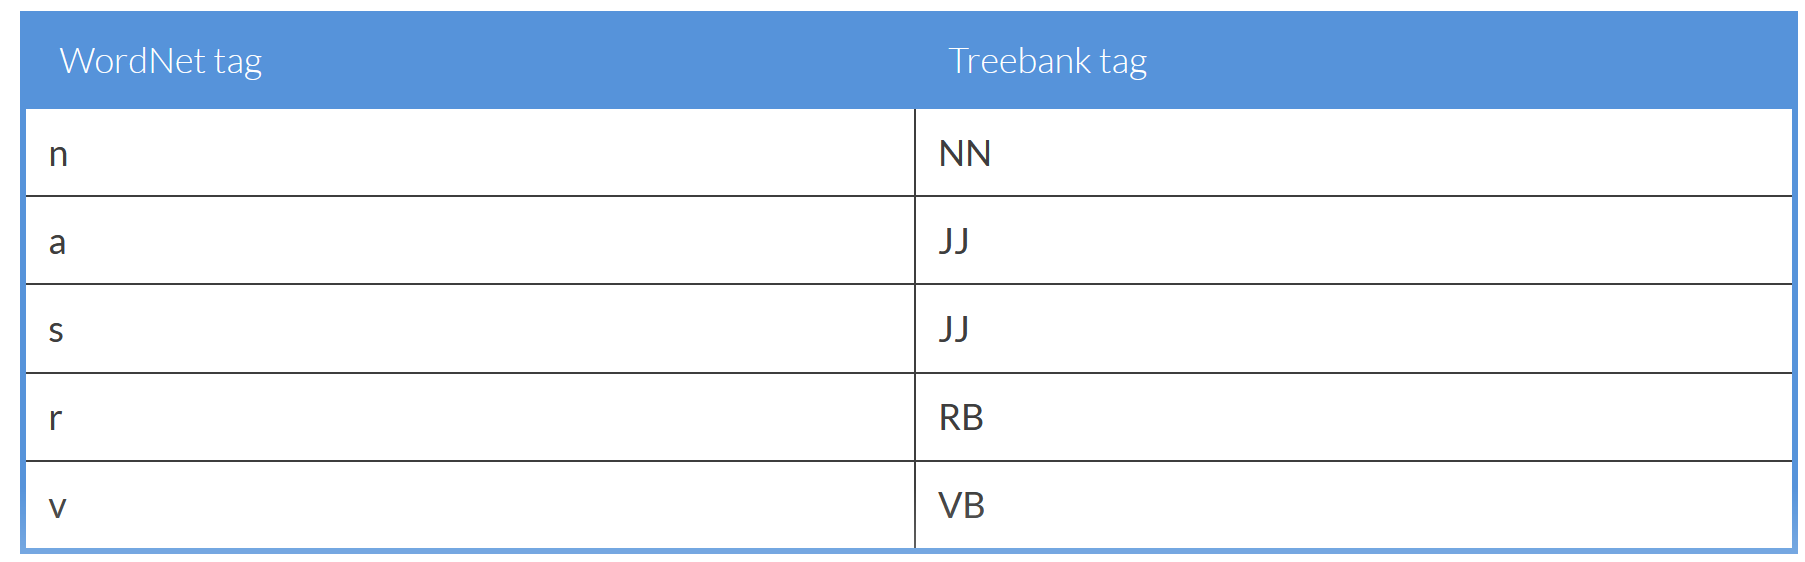

In [30]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_tok_sentence(tw):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sen = []
    for word, tag in pos_tag(tw):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        elif tag.startswith('J'):
            pos = 'a'
        else:
            pos = 'r'
        lemmatized_sen.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sen

In [31]:
print(positive_tweets_[0])
lemmatize_tok_sentence(positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


['#FollowFriday',
 '@France_Inte',
 '@PKuchly57',
 '@Milipol_Paris',
 'for',
 'be',
 'top',
 'engage',
 'member',
 'in',
 'my',
 'community',
 'this',
 'week',
 ':)']

### Limpieza de caracteres basura

Despues de revisar los datos notamos 3 tipos de palabras que probablemnte no nos sean de mucha ayuda.  
  + "handles" que twitter utiliza para contestar
  + links a otras paginas web (pude que nos sirvan)
  + Puntuacion, pero no los smilies.

Haremos uso de expresiones regulares para remover estas palabras. (Si tienes poblemas googlea, esta es una operacion muy comun). 
+ "handles": Estos comienzan con @ seguidos de una palbra sin espacios ->
      "(@[A-Za-z0-9_]+)"
+ "link": Comienzan con http -> 

      "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
+ La puntuacion puede ser removida como stopword o puntuacion. Hay que tener cuidado especial, pues los smilies son formados por puntuacion [  :), :(  ]  
  
Podemos sustituir esta palabras por vacio o espacios.

In [32]:
import re, string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Nota como pasamos las stopwords sugeridas por nltk
def clean_lemmatize(tweet_tokens, stop_words = stopwords.words('english')):

    cleaned_tokens = []
    for token, tag in pos_tag(tweet_tokens):
        # Limpiar url
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]'\
        '|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", token)
        # Limpiar handle
        token = re.sub('(@[A-Za-z0-9_]+)',"", token)

        # Tag for lemmatizer
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        elif tag.startswith('J'):
            pos = 'a'
        else:
            pos = 'r'
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        # Eliminar puntuacion o espacios
        if len(token) > 0 and token not in string.punctuation and \
        token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [33]:
print(positive_tweets_[0])
clean_lemmatize(positive_tweets[0])

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)


['#followfriday', 'top', 'engage', 'member', 'community', 'week', ':)']

Limpiemos los tweets

In [34]:
pos_clean_tweets = list(map(clean_lemmatize, positive_tweets))
neg_clean_tweets = list(map(clean_lemmatize, negative_tweets))

### Contemos las palabras
Para hacer mas eficiente nuestro codigo utilizaremos el keyword yield.   
Yield regresa un generador, por lo que cualquier funcion que apliquemos al generador lo modifica.  
En las celdas mas abajo usaremos la funcion de print, para revisar que nuestra funcion es correcta, pero al momento de utilizar el codigo debes eliminarla, pues afectara a nuestro generador yield.  
Documentacion de yield: https://www.geeksforgeeks.org/use-yield-keyword-instead-return-keyword-python/ 
       
 **Alerta!**  
Si tienes algun error en los siguientes bloques de codigo, incluyendo la parte de entranamiento o prediccion el modelo, probablemente se debe a yield. Regresa a esta parte y ejecuta el pipeline desde aqui. Dado que losd atos string o texto ocupan mucha memoria es mejor dejarlo asi.


In [35]:
def extract_words(cleaned_tokens_list):
    tokens = []
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token


In [36]:
pos_clean_words = extract_words(pos_clean_tweets)
neg_clean_words = extract_words(neg_clean_tweets)

In [37]:
from nltk import FreqDist
pos_distribution = FreqDist(pos_clean_words)
neg_distribution = FreqDist(neg_clean_words)
'''No olvides comentar esto despues de revisar que la funcion funciona correc
tamente, y correr el bloque de nuevo '''
# print('Positive Words')
# print(pos_distribution.most_common(15))
# print('\n Negative Words')
# print(neg_distribution.most_common(15))

'No olvides comentar esto despues de revisar que la funcion funciona correc\ntamente '

Creemos una estructura de diccionario para representar nuestros datos. Esto facilitara su manipulacion y hara el codigo mas eficiente.

In [38]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

Visualizacion del retorno de nuestra funcion.  

In [39]:
pos_tok_model_ = get_tweets_for_model(pos_clean_tweets[0:2])
print([x for x in pos_tok_model_])

[{'#followfriday': True, 'top': True, 'engage': True, 'member': True, 'community': True, 'week': True, ':)': True}, {'hey': True, 'james': True, 'odd': True, ':/': True, 'please': True, 'call': True, 'contact': True, 'centre': True, '02392441234': True, 'able': True, 'assist': True, ':)': True, 'many': True, 'thanks': True}]


In [40]:
pos_tok_model = get_tweets_for_model(pos_clean_tweets)
neg_tok_model = get_tweets_for_model(neg_clean_tweets)

### Crear el Dataset  
neg: Tweet Negativo  
pos: Tweet Positivo

In [41]:
import random

pos_df = [(dict_, 'pos')
          for dict_ in pos_tok_model]

neg_df = [(dict_, 'neg')
          for dict_ in neg_tok_model]

df_tweet = pos_df + neg_df

random.shuffle(df_tweet)

n_train = 8000
train = df_tweet[:n_train]
test = df_tweet[n_train:]

In [42]:
random.shuffle(df_tweet)

## Modelo: Naive Bayes

El siguiente bloque de codigo entrena un Naive Bayes.  
El apartado de "Most Informative features" te muestra los tokens mas importantes, y el porcentaje o proporcion de aparicion. Ejemplo:  
  

---
                      :( = True              neg : pos    =   2338.6 : 1.0


---

Implica que el caracter ":(" aparece 2338 veces mas en tweets negativos.

In [43]:
from nltk import classify
from nltk import NaiveBayesClassifier

classifier = NaiveBayesClassifier.train(train)

print("Accuracy in test is:", classify.accuracy(classifier, test))
print(classifier.show_most_informative_features(15))

Accuracy in test is: 0.997
Most Informative Features
                      :( = True              neg : pos    =   2367.4 : 1.0
                      :) = True              pos : neg    =   1894.3 : 1.0
                follower = True              pos : neg    =     39.1 : 1.0
                    glad = True              pos : neg    =     23.7 : 1.0
                     bam = True              pos : neg    =     21.7 : 1.0
                     sad = True              neg : pos    =     21.1 : 1.0
               community = True              pos : neg    =     17.1 : 1.0
                    blog = True              pos : neg    =     15.7 : 1.0
                     ugh = True              neg : pos    =     14.9 : 1.0
                followed = True              neg : pos    =     14.9 : 1.0
              appreciate = True              pos : neg    =     14.4 : 1.0
                  arrive = True              pos : neg    =     14.2 : 1.0
                     via = True              po

# PyCaret

Ahora repitamos el ejercico anterior usando un pipeline de Pycaret.  
**Documentacion PyCaret NLP**: https://pycaret.org/nlp/ 

In [44]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [45]:
# Importemos los datos
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

positive_tweets_ = twitter_samples.strings('positive_tweets.json')
negative_tweets_ = twitter_samples.strings('negative_tweets.json')
print('\n Glipse Data')
positive_tweets_[0:5]

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!

 Glipse Data


['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days']

Creemos un pandas con los datos

In [87]:
df_pycaret_pos = pd.DataFrame.from_dict({
    'twit':positive_tweets_, 'sentimiento':'pos'
})

df_pycaret_neg = pd.DataFrame.from_dict({
    'twit':negative_tweets_, 'sentimiento':'neg'
})

df_pycaret = pd.concat([df_pycaret_pos, df_pycaret_neg], ignore_index=True)
df_pycaret = df_pycaret.sample(frac=1).reset_index(drop=True)
df_pycaret

,twit,sentimiento
0,"almost 2/3 done with this. Sa lahat ng araw, b...",neg
1,@etherealmind such mental strength! :D,pos
2,@shounshounette @yassmin_a so kind :),pos
3,We love #Friday :),pos
4,@gdicko66 give me an hour and message again wi...,pos
...,...,...
9995,@_andree3000 @swaveyjayy_ @Dearnataliee I just...,pos
9996,Hotel for Dogs was pretty sad too where the br...,neg
9997,"""@jayt_jubby: @SinethembaMpaxa yes hun and you...",pos
9998,"@mbukmagazine Pet Mouse has to be the winner, ...",pos


### Procesamiento

In [97]:
from pycaret.nlp import *
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
# Creamos una lista con nuestros textos
text_list = list(df_pycaret['twit'])
caret_set = setup(data = df_pycaret, target='twit',
                  custom_stopwords=stop_words)

Description,Value
session_id,4161
Documents,10000
Vocab Size,7559
Custom Stopwords,True


### Modelo Lda
Wikipedia: https://es.wikipedia.org/wiki/Latent_Dirichlet_Allocation 

In [98]:
lda = create_model('lda', multi_core = True)
print(lda)
lda_results = assign_model(lda)
lda_results.head()

df_lda = lda_results.drop(['twit', 'Dominant_Topic', 'Perc_Dominant_Topic'],axis=1)
df_lda.head()

,sentimiento,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,neg,0.259209,0.640526,0.050113,0.050152,Topic 1,0.64
1,pos,0.083479,0.415371,0.417703,0.083447,Topic 2,0.42
2,pos,0.250000,0.250000,0.250000,0.250000,Topic 0,0.25
3,pos,0.125000,0.125000,0.125000,0.624999,Topic 3,0.62
4,pos,0.134799,0.022731,0.818828,0.023642,Topic 2,0.82


In [99]:
from pycaret.classification import *
pce_1 = setup(data = df_lda, target = 'sentimiento', session_id = 13,
              train_size = 0.8)

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.5884,0.6206,0.5883,0.5905,0.5858,0.1766,0.1788,0.892
lightgbm,Light Gradient Boosting Machine,0.5851,0.6211,0.5850,0.5879,0.5816,0.1701,0.1729,0.137
catboost,CatBoost Classifier,0.5851,0.6180,0.5850,0.5881,0.5815,0.1701,0.1731,4.551
gbc,Gradient Boosting Classifier,0.5806,0.6130,0.5805,0.5843,0.5757,0.1611,0.1648,0.878
rf,Random Forest Classifier,0.5796,0.6153,0.5795,0.5809,0.5778,0.1591,0.1605,1.371
et,Extra Trees Classifier,0.5768,0.6105,0.5767,0.5779,0.5751,0.1534,0.1546,0.891
knn,K Neighbors Classifier,0.5700,0.5987,0.5699,0.5714,0.5678,0.1399,0.1413,0.152
ada,Ada Boost Classifier,0.5689,0.5903,0.5688,0.5713,0.5652,0.1376,0.1401,0.321
dt,Decision Tree Classifier,0.5652,0.5639,0.5652,0.5661,0.5637,0.1304,0.1313,0.061
lr,Logistic Regression,0.5576,0.5689,0.5575,0.5599,0.5534,0.1151,0.1174,0.310


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=13, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              validate_parameters=1, verbosity=0)